<a href="https://colab.research.google.com/github/sapkotasriyas/MachineLearning/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [7]:
df = pd.read_csv("winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

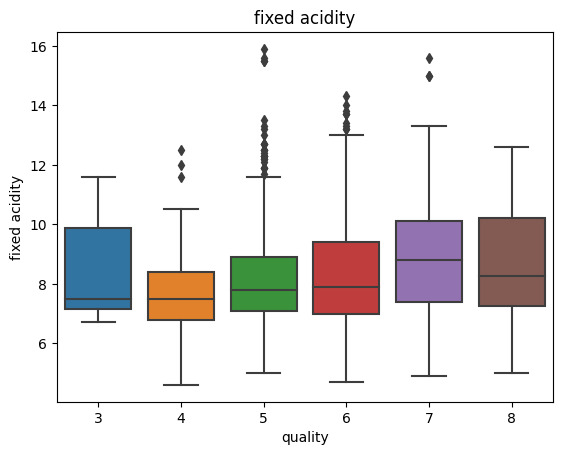

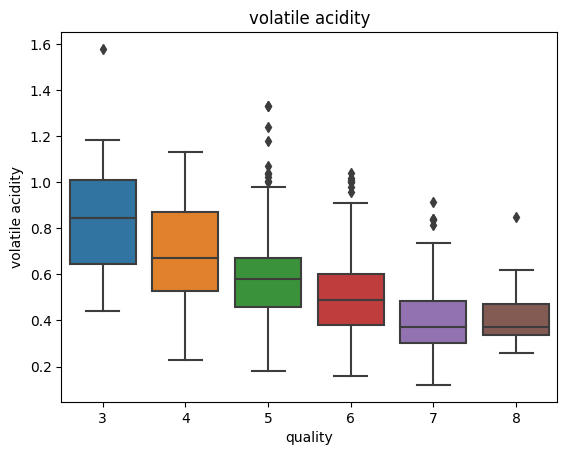

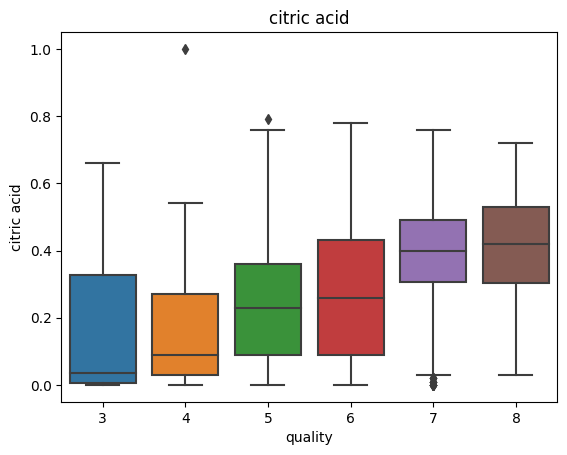

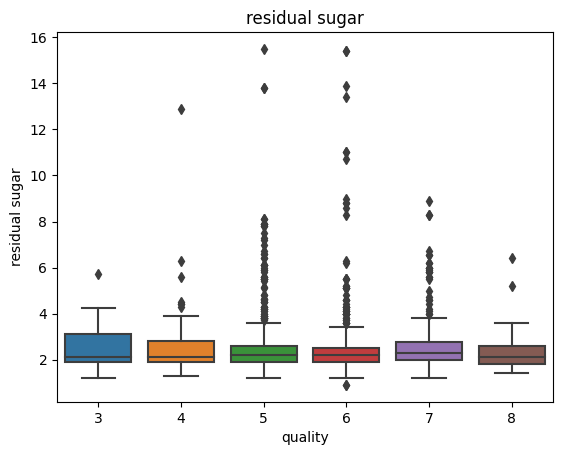

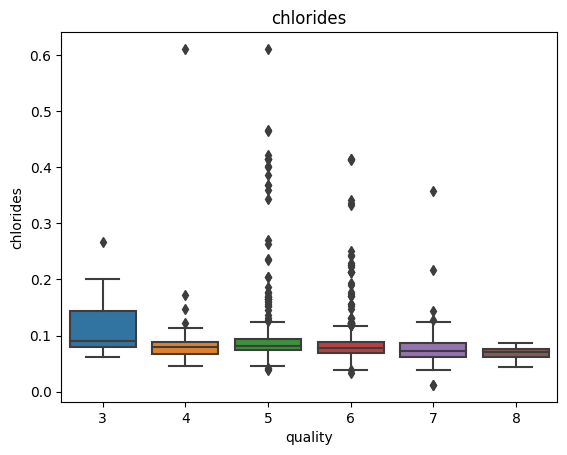

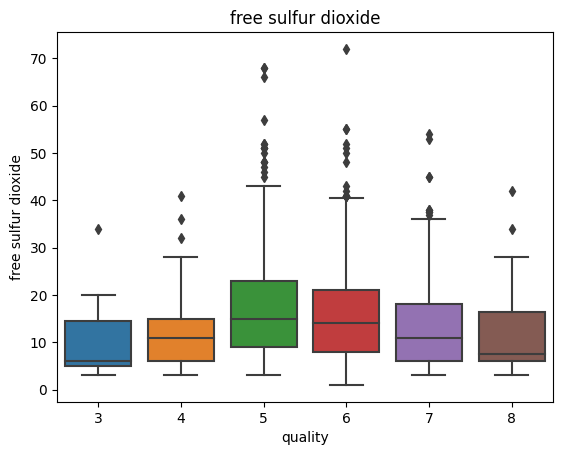

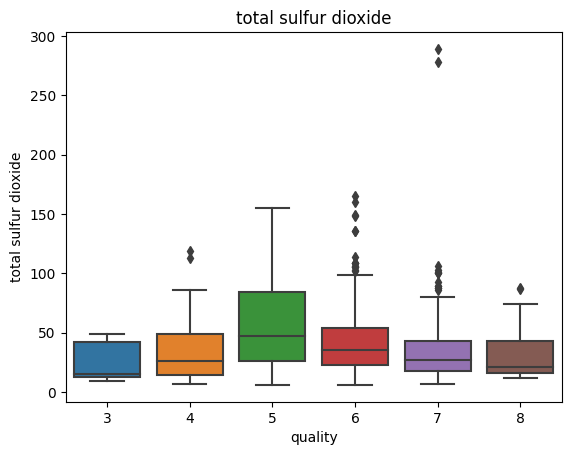

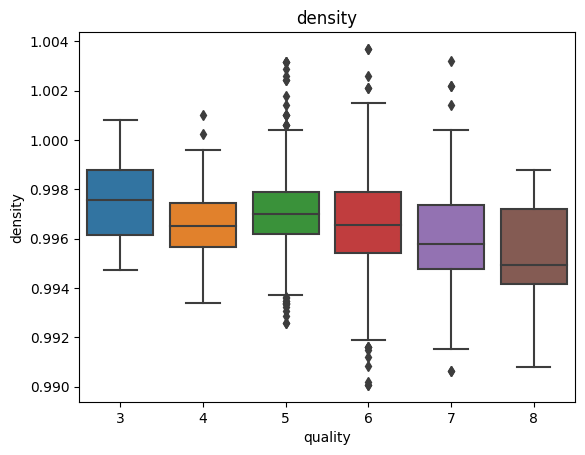

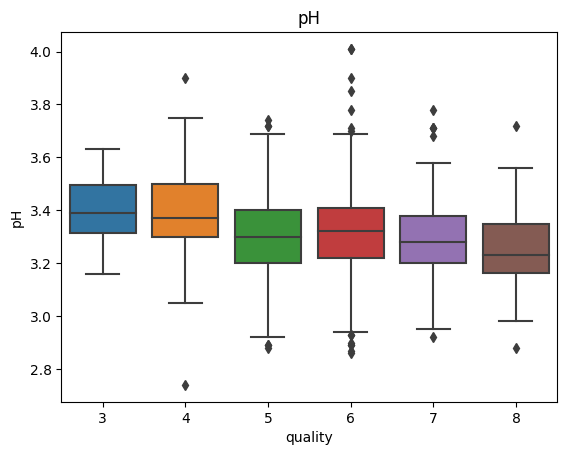

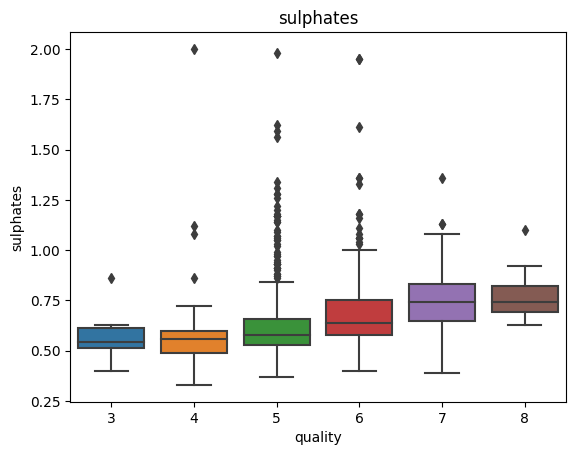

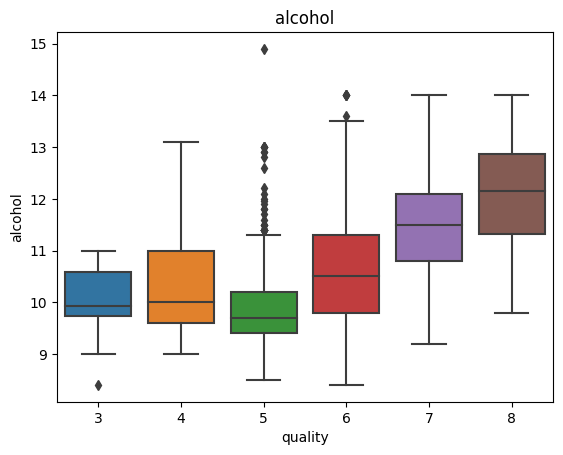

In [25]:
for cols in df.columns[:-1]:
  #fig = plt.figure(figsize = (10, 6))
  sns.boxplot(x = df['quality'], y = cols, data = df)
  plt.title(cols)
  plt.show()

<Axes: >

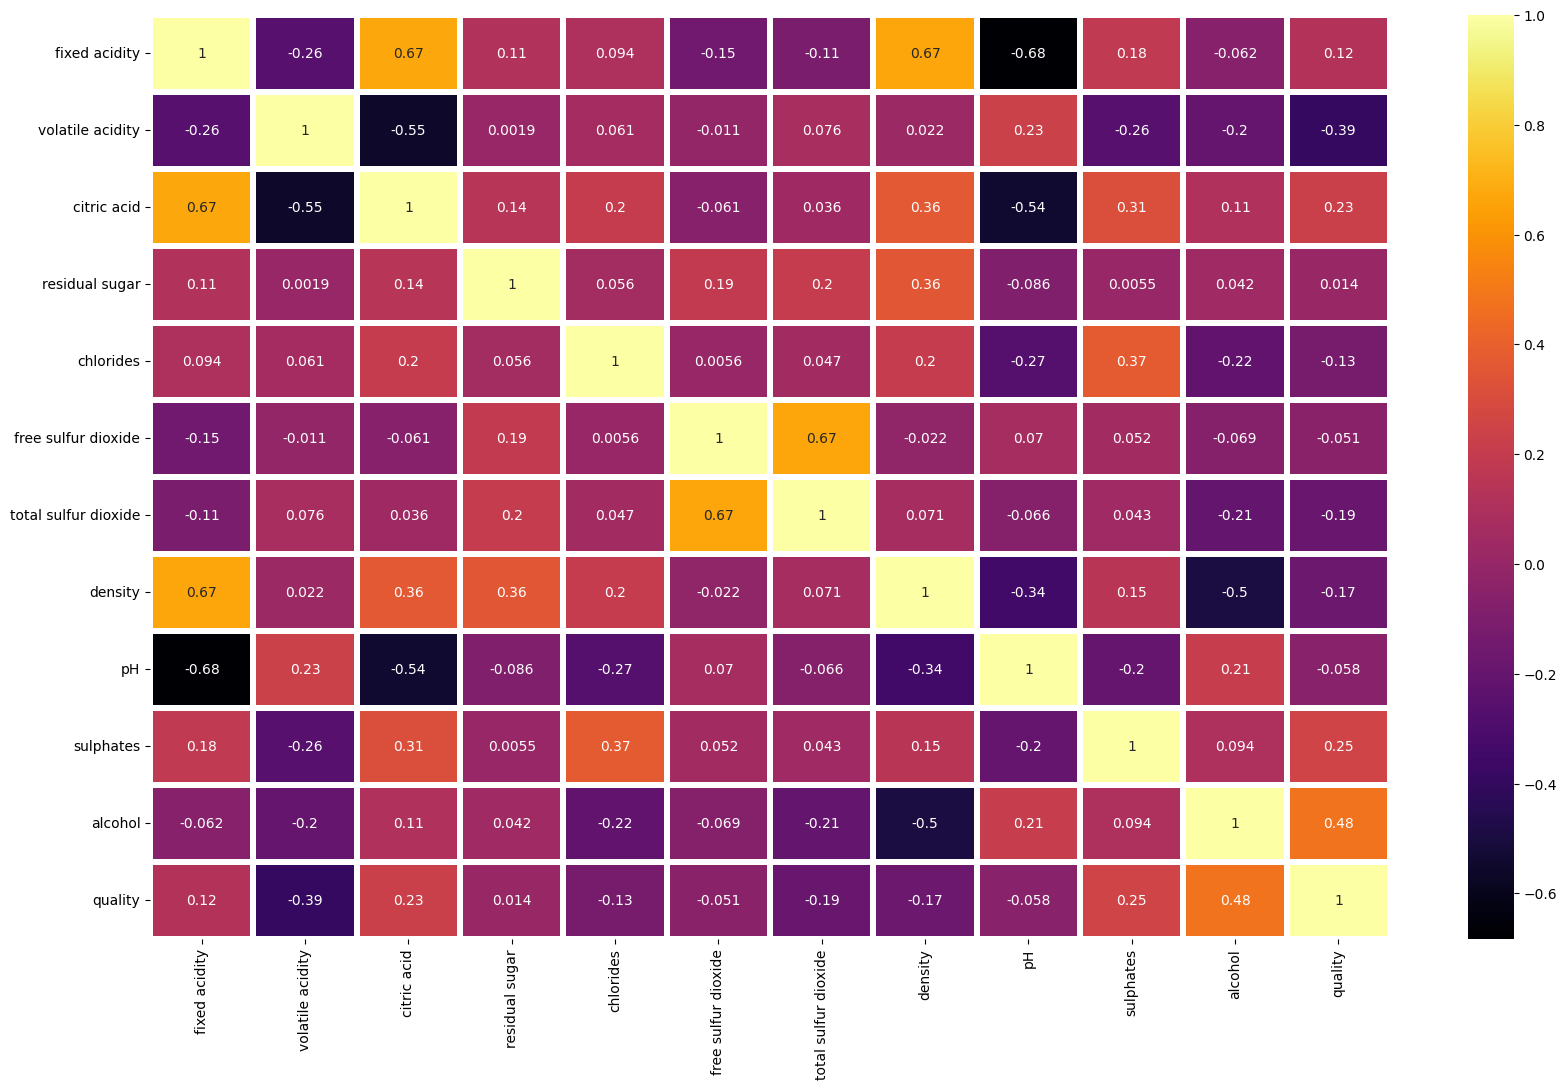

In [35]:
plt.figure(figsize= [20, 12])
sns.heatmap(df.corr(), annot = True, linewidth = 3, cmap = 'inferno')

In [42]:
bins = (0, 6.5, 10)
quality_type = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = quality_type)

In [44]:
df['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [48]:
lenc = LabelEncoder()
df['quality'] = lenc.fit_transform(df['quality'])

In [49]:
df['quality'].unique()

array([0, 1])

In [53]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [55]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Random Forest Classifier

In [59]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
rfc_pred = rfc.predict(X_test)

In [69]:
print(f"Classification report:", classification_report(y_test, rfc_pred))
print(f"The accuracy score of Random Forest Classifier is: ", accuracy_score(y_test, rfc_pred))

Classification report:               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.49      0.59        47

    accuracy                           0.90       320
   macro avg       0.83      0.73      0.77       320
weighted avg       0.89      0.90      0.89       320

The accuracy score of Random Forest Classifier is:  0.9


Gradient Boosting Classifier

In [71]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [72]:
gbc_pred = gbc.predict(X_test)

In [73]:
print(f"Classification report:", classification_report(y_test, gbc_pred))
print(f"The accuracy score of Gradient Boosting Classifier: ", accuracy_score(y_test, gbc_pred))

Classification report:               precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.64      0.45      0.52        47

    accuracy                           0.88       320
   macro avg       0.77      0.70      0.73       320
weighted avg       0.87      0.88      0.87       320

The accuracy score of Gradient Boosting Classifier:  0.88125


KNeighbors Classifier

In [76]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
knn_pred = knn.predict(X_test)

In [78]:
print(f"Classification report: ", classification_report(y_test, gbc_pred))
print(f"The accuracy score of KNeighbors Classifier is: ", accuracy_score(y_test, knn_pred))

Classification report:                precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.64      0.45      0.52        47

    accuracy                           0.88       320
   macro avg       0.77      0.70      0.73       320
weighted avg       0.87      0.88      0.87       320

The accuracy score of KNeighbors Classifier is:  0.878125
